In [63]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import copy

## Read data

In [64]:
hexa = pd.read_csv('FeedForward_Data_hexa.csv', names=['dim1','dim2','label'])

In [65]:
#%% plot function
        
def plot_data(X, y, filename):
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral, s = 1)
    plt.savefig(filename)
    plt.close()

def plot_decision_boundary(clf, X, y):
    # Set min and max values and give it some padding
    #x_min, x_max = X[:, 0].min() - .1, X[:, 0].max() + .1
    #y_min, y_max = X[:, 1].min() - .1, X[:, 1].max() + .1
    x_min, x_max = -1.0, 1.0
    y_min, y_max = -1.0, 1.0
    h = 0.01
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Predict the function value for the whole gid
    #Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    X_out = clf(torch.tensor(np.c_[xx.ravel(), yy.ravel()], dtype = torch.float))
    Z = X_out.data.max(1)[1]
    # Z.shape
    Z = Z.reshape(xx.shape)
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral, s = 1)
#     plt.savefig(filename)
#     plt.close()

## Part b

In [66]:
X_hexa = hexa.values[:, 0:2]  # Take only the first two features.     
X_hexa = torch.tensor(X_hexa, dtype = torch.float)   
y_hexa = hexa.values[:, 2]
y_hexa = torch.tensor(y_hexa, dtype = torch.long)

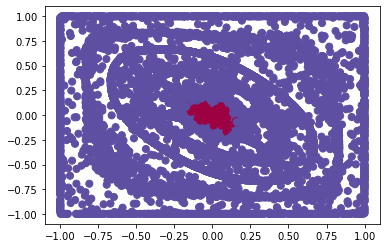

In [67]:
plt.scatter(X_hexa[:, 0], X_hexa[:, 1], c=y_hexa, cmap=plt.cm.Spectral, s = 50)

In [68]:
class Net_a(nn.Module):
    
    def __init__(self):
        super(Net_a, self).__init__()
        self.fc1 = nn.Linear(2, 15)
        torch.nn.init.uniform_(self.fc1.weight, a=-1, b=1)
        
        self.fc2 = nn.Linear(15, 15)
        torch.nn.init.uniform_(self.fc2.weight, a=-1, b=1)
        
        self.fc3 = nn.Linear(15, 15)
        torch.nn.init.uniform_(self.fc3.weight, a=-1, b=1)
        
        self.fc4 = nn.Linear(15, 15)
        torch.nn.init.uniform_(self.fc4.weight, a=-1, b=1)
        
        self.fc5 = nn.Linear(15, 15)
        torch.nn.init.uniform_(self.fc5.weight, a=-1, b=1)
        
        self.fc6 = nn.Linear(15, 2)
        torch.nn.init.uniform_(self.fc6.weight, a=-1, b=1)
        
#         self.fc4 = nn.Linear(8, 8)
#         torch.nn.init.uniform_(self.fc4.weight, a=-2, b=2)
        
#         self.fc5 = nn.Linear(8, 2)
#         torch.nn.init.uniform_(self.fc5.weight, a=-2, b=2)
        
#         self.fc6 = nn.Linear(5, 2)
#         torch.nn.init.uniform_(self.fc6.weight, a=0, b=1)
        
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = F.relu(self.fc4(x))
        x = F.relu(self.fc5(x))
        x = self.fc6(x)
        return F.log_softmax(x)
        #return F.softmax(x)

In [69]:
previous_loss = 1

#%% train
net_a = Net_a()

# create a stochastic gradient descent optimizer
learning_rate = .02
# optimizer = torch.optim.SGD(net_a.parameters(), lr=learning_rate, momentum=0.9)
optimizer = torch.optim.Adam(net_a.parameters(), lr=learning_rate)


# create a loss function
#criterion = nn.CrossEntropyLoss()
criterion = nn.NLLLoss()

#Stopping conditions
stopping_crit = np.power(1/10,6)
nepochs = 24000

data, target = X_hexa, y_hexa
# run the main training loop
for epoch in range(nepochs):
    #    adjust learning rate if desired
    if epoch % 3000 == 0 and epoch <= 24000:
        for g in optimizer.param_groups:
            g['lr'] = g['lr']/2
    optimizer.zero_grad()
    # forward propagate
    net_out = net_a(data)
    # compute loss
    loss = criterion(net_out, target)
    
    # backpropagate
    loss.backward()
    # update parameters
    optimizer.step()
    # print out report
    
    if epoch % 100 == 0:
        print('Epoch ', epoch, 'Loss ', loss.item())
        net_out = net_a(data)
        pred = net_out.data.max(1)[1]  # get the index of the max log-probability
        correctidx = pred.eq(target.data) 
        ncorrect = correctidx.sum()
        accuracy = ncorrect.item()/len(data)
        print('Training accuracy is ', accuracy)
#         if accuracy >= 0.97:
#             break
    
#     if abs(previous_loss - loss.item()) < stopping_crit:
#         break
    
    previous_loss = copy.copy(loss.item())
    
#%% compute accuracy on training data
net_out = net_a(data)
pred = net_out.data.max(1)[1]  # get the index of the max log-probability
correctidx = pred.eq(target.data) 
ncorrect = correctidx.sum()
accuracy = ncorrect.item()/len(data)
print('Training accuracy is ', accuracy)

<ipython-input-68-bc74ff3165ce>:39: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)


Epoch  0 Loss  0.6433263421058655
Training accuracy is  0.9326923076923077
Epoch  100 Loss  0.06511369347572327
Training accuracy is  0.9698768028846154
Epoch  200 Loss  0.05239234119653702
Training accuracy is  0.9718299278846154
Epoch  300 Loss  0.05037832632660866
Training accuracy is  0.9750600961538461
Epoch  400 Loss  0.0548492930829525
Training accuracy is  0.9673978365384616
Epoch  500 Loss  0.05086705461144447
Training accuracy is  0.9751352163461539
Epoch  600 Loss  0.05070805922150612
Training accuracy is  0.9746844951923077
Epoch  700 Loss  0.047942280769348145
Training accuracy is  0.9738581730769231
Epoch  800 Loss  0.05055825412273407
Training accuracy is  0.9752854567307693
Epoch  900 Loss  0.048520129173994064
Training accuracy is  0.9791917067307693
Epoch  1000 Loss  0.05011437460780144
Training accuracy is  0.9836989182692307
Epoch  1100 Loss  0.04211246967315674
Training accuracy is  0.9764122596153846
Epoch  1200 Loss  0.0399797186255455
Training accuracy is  0.977

Epoch  10400 Loss  0.011601640842854977
Training accuracy is  0.9974459134615384
Epoch  10500 Loss  0.011215648613870144
Training accuracy is  0.9960186298076923
Epoch  10600 Loss  0.010809903033077717
Training accuracy is  0.9974459134615384
Epoch  10700 Loss  0.011092295870184898
Training accuracy is  0.9962439903846154
Epoch  10800 Loss  0.011049962602555752
Training accuracy is  0.9976712740384616
Epoch  10900 Loss  0.010676901787519455
Training accuracy is  0.9976712740384616
Epoch  11000 Loss  0.010989583097398281
Training accuracy is  0.9969200721153846
Epoch  11100 Loss  0.010908941738307476
Training accuracy is  0.9974459134615384
Epoch  11200 Loss  0.010940462350845337
Training accuracy is  0.9969200721153846
Epoch  11300 Loss  0.010188297368586063
Training accuracy is  0.9975961538461539
Epoch  11400 Loss  0.010109872557222843
Training accuracy is  0.9974459134615384
Epoch  11500 Loss  0.010093258693814278
Training accuracy is  0.9972956730769231
Epoch  11600 Loss  0.0109305

Epoch  20700 Loss  0.007005487568676472
Training accuracy is  0.9978966346153846
Epoch  20800 Loss  0.006988103501498699
Training accuracy is  0.9981971153846154
Epoch  20900 Loss  0.006984528619796038
Training accuracy is  0.9979717548076923
Epoch  21000 Loss  0.006937055848538876
Training accuracy is  0.998046875
Epoch  21100 Loss  0.0069179292768239975
Training accuracy is  0.998046875
Epoch  21200 Loss  0.006907928269356489
Training accuracy is  0.998046875
Epoch  21300 Loss  0.006900492589920759
Training accuracy is  0.998046875
Epoch  21400 Loss  0.006890029646456242
Training accuracy is  0.998046875
Epoch  21500 Loss  0.006880751810967922
Training accuracy is  0.998046875
Epoch  21600 Loss  0.006872051395475864
Training accuracy is  0.998046875
Epoch  21700 Loss  0.006864113733172417
Training accuracy is  0.9981219951923077
Epoch  21800 Loss  0.00685246754437685
Training accuracy is  0.998046875
Epoch  21900 Loss  0.00684469286352396
Training accuracy is  0.9979717548076923
Epoc

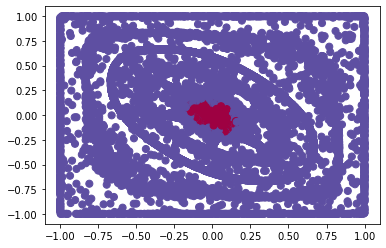

In [70]:
plt.scatter(X_hexa[:, 0], X_hexa[:, 1], c=pred, cmap=plt.cm.Spectral, s = 50)

<ipython-input-68-bc74ff3165ce>:39: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)


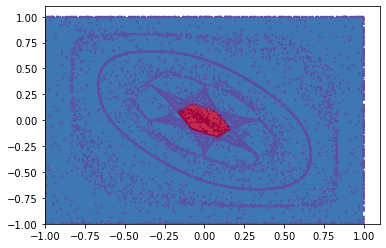

In [72]:
plot_decision_boundary(net_a, X_hexa, y_hexa)

In [73]:
print(net_a.fc1.weight)
print(net_a.fc2.weight)
print(net_a.fc3.weight)
print(net_a.fc4.weight)
print(net_a.fc5.weight)
print(net_a.fc6.weight)

Parameter containing:
tensor([[-0.3745,  0.0193],
        [-1.3800,  0.8869],
        [ 1.3187, -1.3219],
        [ 0.1474,  0.0293],
        [ 0.9948,  1.1990],
        [ 2.0327,  0.8654],
        [ 1.7214,  0.0788],
        [-0.2921, -0.6378],
        [ 0.1406,  0.8146],
        [ 0.0026,  0.8832],
        [-0.9051, -1.3740],
        [ 0.7443,  1.6997],
        [ 0.9463, -1.2835],
        [ 0.9091,  0.2416],
        [-0.0704,  0.1904]], requires_grad=True)
Parameter containing:
tensor([[-0.4009,  0.5313,  1.6009, -0.1528, -1.3516, -0.8387,  0.7495, -0.9098,
          0.1776,  0.0469,  0.2745,  0.0902,  0.0722,  0.0736,  0.0388],
        [ 0.2344,  3.4509,  0.8301,  0.7862,  0.2529,  1.0414,  0.8484, -0.4413,
          0.8030,  0.9005, -1.1070,  1.1024, -0.0698,  0.0200,  0.5230],
        [ 0.9789, -0.9598, -0.3225, -0.0436, -0.6535, -0.1124, -0.7425, -0.1434,
          0.7764,  0.3281, -0.3616, -0.4130, -0.4829, -0.1575,  0.8566],
        [ 0.2457,  0.7280, -0.0775,  0.0628, -0.2933,